In [ ]:
! for f in ~/dataset/voxceleb/vox/dev/aac/id00012/*.m4a; do ffmpeg -i "$f" "${f/%m4a/wav}"; done

In [62]:
import IPython
import os

In [102]:
basepath = "/home/jovyan/dataset/voxceleb/vox/dev/aac/"

In [104]:
path1 = basepath + "/id00067/9PZ9eff6Pwk/00002.m4a"
path2 = basepath + "/id00067/9PZ9eff6Pwk/00003.m4a"
os.environ['path1'] = path1
os.environ['path2'] = path2

In [99]:
IPython.display.Audio(filename=path1)

In [100]:
IPython.display.Audio(filename=path2)

In [106]:
os.environ['filename_out'] = 'output2'
! rm -f ${filename_out}.wav
! ffmpeg -i ${path2} ${filename_out}.wav

ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --

In [74]:
import speechpy
import scipy.io.wavfile as wav

In [130]:
fs,signal = wav.read("output2.wav")
print(signal.shape)
print(signal)

logenergy = speechpy.feature.lmfe(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
             num_filters=80, fft_length=512, low_frequency=0)
logenergy_feature_cube = speechpy.feature.extract_derivative_feature(logenergy)

(66560,)
[ 1 -3  4 ...  0  0  0]


In [131]:
print (logenergy_feature_cube.shape)
print (logenergy_feature_cube)

(414, 80, 3)
[[[  8.26949883   2.71282702   0.89469507]
  [  8.26949883   2.82881571   0.94074543]
  [  9.42938569   3.05906751   0.96833536]
  ...
  [  4.52474153   2.09482801   0.65478852]
  [  6.3974241    2.1826284    0.65478852]
  [  7.275428     2.1826284    0.65478852]]

 [[  8.72662769   2.79162536   0.90720043]
  [  8.72662769   2.87844389   0.95086769]
  [  9.59481296   3.09678019   0.98772423]
  ...
  [  7.80643971   2.39794789   0.73290687]
  [  7.69265963   2.4430229    0.73290687]
  [  8.14340965   2.4430229    0.73290687]]

 [[  9.06711721   2.66856793   0.85886683]
  [  9.06711721   2.64278431   0.92489837]
  [  8.80928105   2.97294199   0.86785071]
  ...
  [  8.03738867   2.4094684    0.81096957]
  [  6.07313788   2.70323191   0.81096957]
  [  9.01077304   2.70323191   0.81096957]]

 ...

 [[  2.47432693   0.72773769   0.2349402 ]
  [  2.47432693   0.7204575    0.25374316]
  [  2.40152498   0.81447228   0.27060916]
  ...
  [  4.48145327   1.00068576   0.26559132]
  [  

In [132]:
import matplotlib.pyplot as plt
import numpy as np

(80, 414)


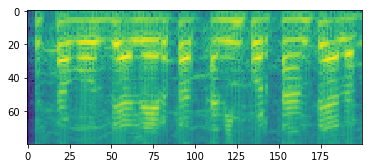

In [133]:
log_norm = np.linalg.norm(logenergy_feature_cube,axis=-1)
print(log_norm.transpose().shape)
plt.imshow(log_norm.transpose()[:,0:200])
plt.show()
# plt.specgram(signal, Fs=fs,xextent=(0,192000))
IPython.display.Audio(filename=path1)